# DSC 680 Project One

Logan Quandt

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [235]:
#load in training df & ensure it loaded correctly
train_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/train.csv")
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [236]:
#load in test df & ensure it loaded correctly
test_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/test.csv")
test_df.tail()

,id,date,store_nbr,family,onpromotion
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


In [237]:
#load in oil df & ensure it loaded correctly
oil_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/oil.csv")
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [238]:
#load in store df & ensure it loaded correctly
store_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/stores.csv")
store_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [239]:
#load in holiday df & ensure it loaded correctly
holiday_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/holidays_events.csv")
holiday_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [240]:
#load in transaction df & ensure it loaded correctly
transaction_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/transactions.csv")
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [241]:
#view shape of each DF
print(f'Train_Df Shape: {train_df.shape}')
print(f'Test_Df Shape: {test_df.shape}')
print(f'Oil_Df Shape: {oil_df.shape}')
print(f'Store_Df Shape: {store_df.shape}')
print(f'Holiday_Df Shape: {holiday_df.shape}')
print(f'Transaction_Df Shape: {transaction_df.shape}')

Train_Df Shape: (3000888, 6)
Test_Df Shape: (28512, 5)
Oil_Df Shape: (1218, 2)
Store_Df Shape: (54, 5)
Holiday_Df Shape: (350, 6)
Transaction_Df Shape: (83488, 3)


In [242]:
#print # of missing values in each DF
print('Train_df NAs\n: ', train_df.isna().sum())
print('\nTest_df NAs: \n', test_df.isna().sum())
print('\nOil_df NAs: \n', oil_df.isna().sum())
print('\nStore_df NAs: \n', store_df.isna().sum())
print('\nHoliday_df NAs: \n', holiday_df.isna().sum())
print('\nTransaction_df NAs: \n', transaction_df.isna().sum())

Train_df NAs
:  id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Test_df NAs: 
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Oil_df NAs: 
 date           0
dcoilwtico    43
dtype: int64

Store_df NAs: 
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Holiday_df NAs: 
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Transaction_df NAs: 
 date            0
store_nbr       0
transactions    0
dtype: int64


In [243]:
#correct missing values in oil_df by backfilling
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].fillna(method = 'bfill')
oil_df.isna().sum()

date          0
dcoilwtico    0
dtype: int64

In [244]:
#check dtypes of main dataframes
print('Train_df Dtypes:\n', train_df.dtypes)
print('\nTest_df Dtypes:\n', test_df.dtypes)

Train_df Dtypes:
 id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

Test_df Dtypes:
 id              int64
date           object
store_nbr       int64
family         object
onpromotion     int64
dtype: object


In [245]:
#convert all dates to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
holiday_df['date'] = pd.to_datetime(holiday_df['date'])
transaction_df['date'] = pd.to_datetime(transaction_df['date'])

In [246]:
#merge all supplemental dfs to main df
train_df1 = train_df.merge(holiday_df, on = 'date', how = 'left')
train_df1 = train_df1.merge(oil_df, on = 'date', how = 'left')
train_df1 = train_df1.merge(store_df, on = 'store_nbr', how = 'left')
train_df1 = train_df1.merge(transaction_df, on = ['date', 'store_nbr'], how = 'left')
train_df1.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN


In [247]:
#rename columns for clarity
train_df1 = train_df1.rename(columns = {'type_x':'holiday_type', 'type_y': 'store_type'})
train_df1.head()

,id,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,dcoilwtico,city,state,store_type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,93.14,Quito,Pichincha,D,13,NaN


# EDA

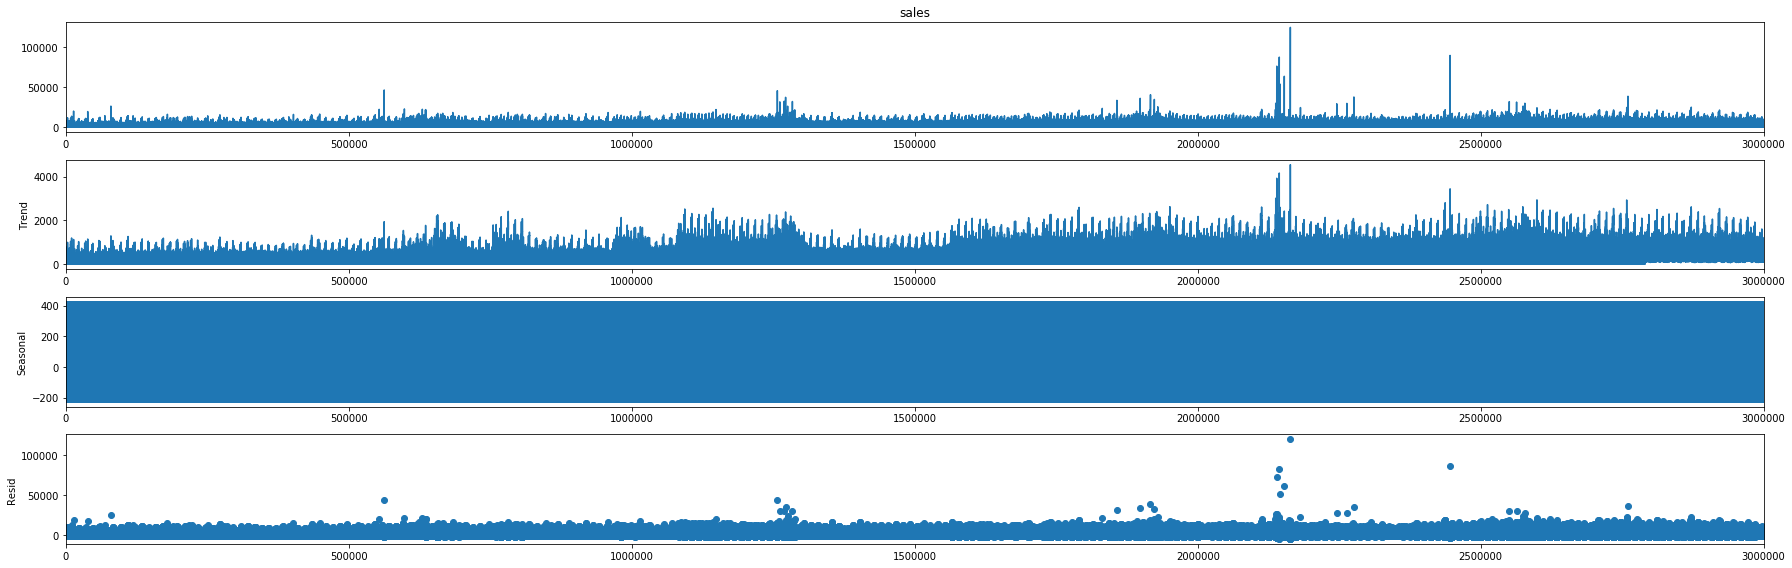

In [248]:
#visualize the seasonal decomposition of trend, seasonality and residual
decomposition = sm.tsa.seasonal_decompose(train_df['sales'], model='additive', period = 30)
fig = decomposition.plot()
plt.show()

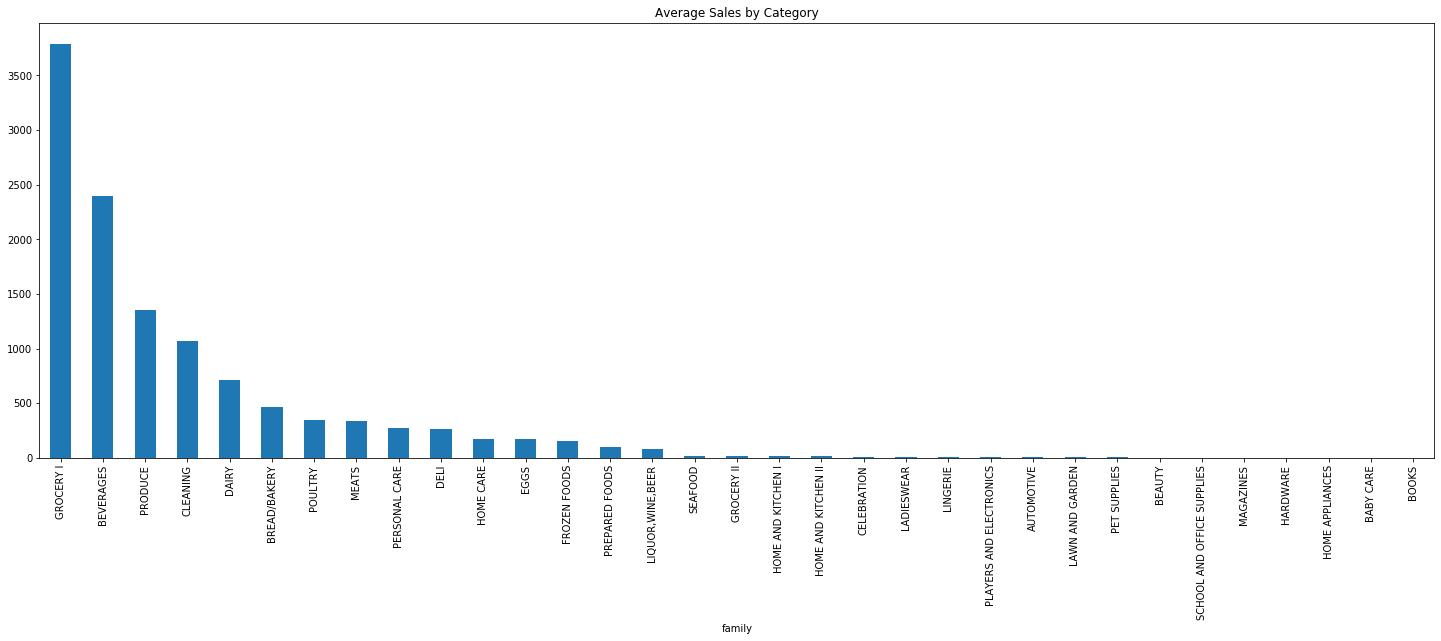

In [249]:
#visualize the sales by category
train_df1.groupby('family')['sales'].mean().sort_values(ascending=False).plot(kind = 'bar', figsize = (25,8), title = 'Average Sales by Category')

In [250]:
#view numbers of sales by category
top_fam_sales = train_df1['sales'].groupby(train_df1['family']).sum().sort_values(ascending=False)
print(top_fam_sales[0:10])

family
GROCERY I        3.508273e+08
BEVERAGES        2.216635e+08
PRODUCE          1.254480e+08
CLEANING         9.942102e+07
DAIRY            6.582360e+07
BREAD/BAKERY     4.295992e+07
POULTRY          3.249445e+07
MEATS            3.165100e+07
PERSONAL CARE    2.510048e+07
DELI             2.458563e+07
Name: sales, dtype: float64


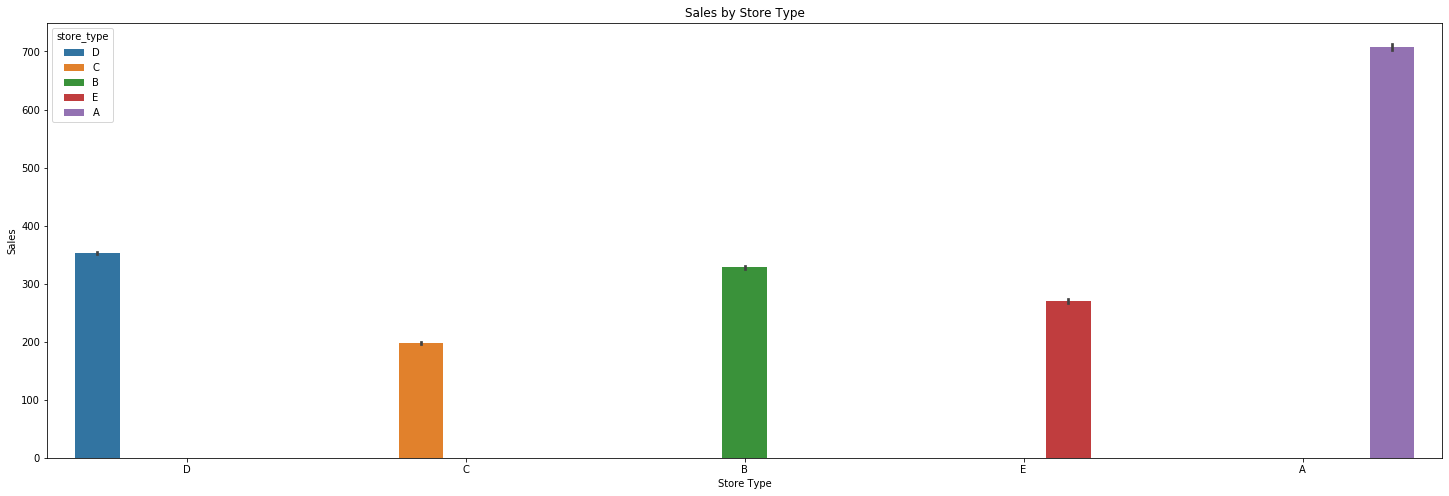

In [251]:
#plot sales by store type
plt.rcParams["figure.figsize"] = (25,8)
sns.barplot(data = train_df1, y = 'sales', x='store_type', hue = 'store_type')
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

In [252]:
#calculate actual sale numbers by store type
top_fam_sales = train_df1['sales'].groupby(train_df1['store_type']).sum().sort_values(ascending=False)
print(top_fam_sales[0:5])

store_type
A    3.606056e+08
D    3.584629e+08
C    1.678115e+08
B    1.485432e+08
E    6.115155e+07
Name: sales, dtype: float64


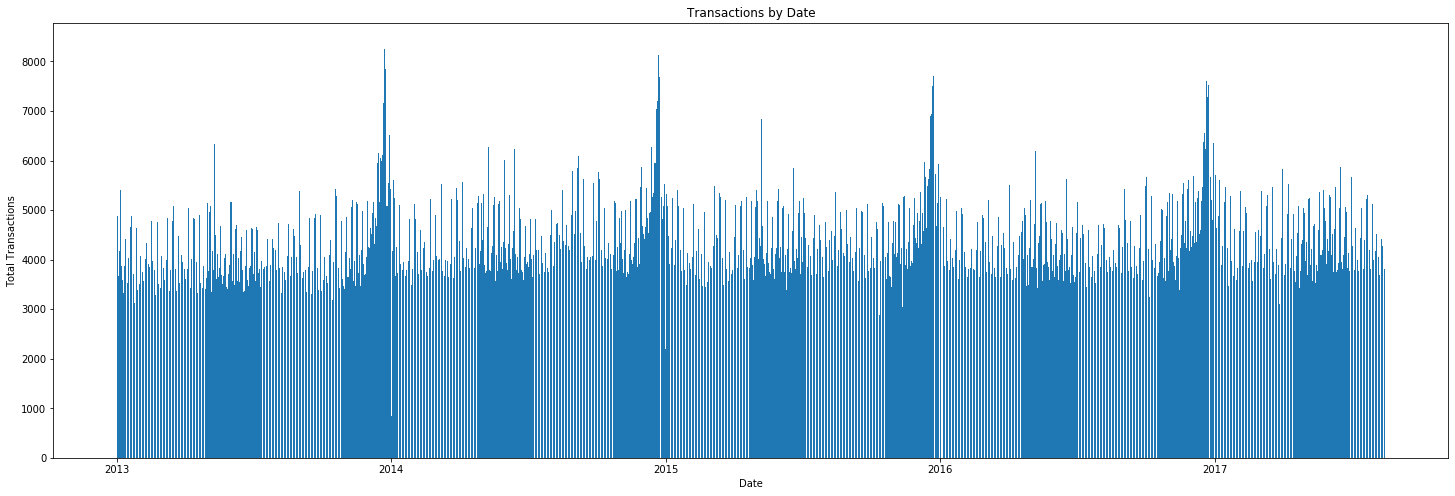

In [253]:
#view transactions by date
plt.bar(transaction_df['date'],transaction_df['transactions'])
plt.title('Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Total Transactions')
plt.show()

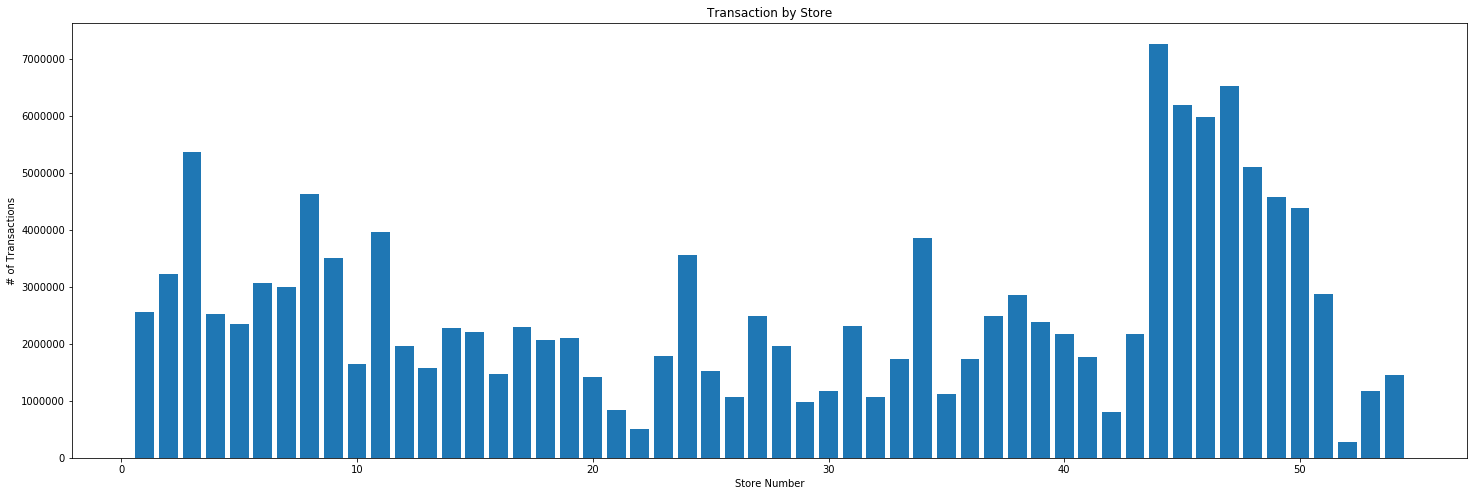

In [254]:
#view transactions by store
transaction_store = transaction_df[['store_nbr', 'transactions']].groupby('store_nbr').sum()
transaction_store = transaction_store.reset_index()
plt.bar(transaction_store['store_nbr'], transaction_store['transactions'])
plt.title('Transaction by Store')
plt.xlabel('Store Number')
plt.ylabel('# of Transactions')
plt.show()

In [255]:
#view unique store IDs and count of total stores
print(store_df['store_nbr'].unique())
print(store_df['store_nbr'].count())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54]
54


In [256]:
#sort stores by total sales
train_df1['sales'].groupby(train_df1['store_nbr']).mean().sort_values(ascending=False)

store_nbr
44    1120.118405
45     984.565998
47     919.777871
3      911.098054
49     784.039156
46     756.775349
48     649.584599
51     594.106667
8      550.264615
50     517.551554
11     511.059261
7      485.565528
9      476.819765
6      454.736152
24     428.446546
2      389.428979
39     365.364928
37     359.922953
27     346.571239
4      341.310288
38     340.302199
28     332.373163
40     331.657375
17     325.591963
31     320.714527
34     307.983071
43     295.640877
5      281.184866
36     276.729400
41     271.126565
33     255.849898
1      254.651925
18     239.594719
20     236.567080
19     235.352549
23     210.141471
15     206.267681
25     206.050640
14     205.269313
53     204.407620
54     199.981717
16     198.104822
12     192.300469
13     189.718879
29     176.398519
10     173.597978
21     168.098514
42     162.128509
26     140.183026
35     138.302551
30     133.271473
32     107.317900
22      74.275130
52      48.883885
Name: sales, dtype

# Models

In [257]:
#create df to use for modeling 
model_df = pd.read_csv("/Users/logan/Documents/GitHub/DSC680/Project One/Data/train.csv")
model_df['date'] = pd.to_datetime(model_df['date'])
model_df['sales'] = model_df['sales'].astype('float32')
model_df = model_df.set_index('date').resample('m').sales.mean().reset_index()
model_df = model_df.set_index('date')
model_df.head()

,sales
date,
2013-01-31,186.952408
2013-02-28,193.581848
2013-03-31,206.880585
2013-04-30,205.639069
2013-05-31,209.943588


In [258]:
#drop nas
model_df.dropna().head()

,sales
date,
2013-01-31,186.952408
2013-02-28,193.581848
2013-03-31,206.880585
2013-04-30,205.639069
2013-05-31,209.943588


In [259]:
#create copy for second model
model_df_two = model_df.copy()
model_df_two.head()

,sales
date,
2013-01-31,186.952408
2013-02-28,193.581848
2013-03-31,206.880585
2013-04-30,205.639069
2013-05-31,209.943588


In [260]:
#use ADF test to check for stationarity
ad_fuller_result = adfuller(model_df['sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.574663900753905
p-value: 0.4963069245748604


In [261]:
#use first order differencing to correct the non-stationarity
model_df['First sales difference'] = model_df['sales'] - model_df['sales'].shift(1)

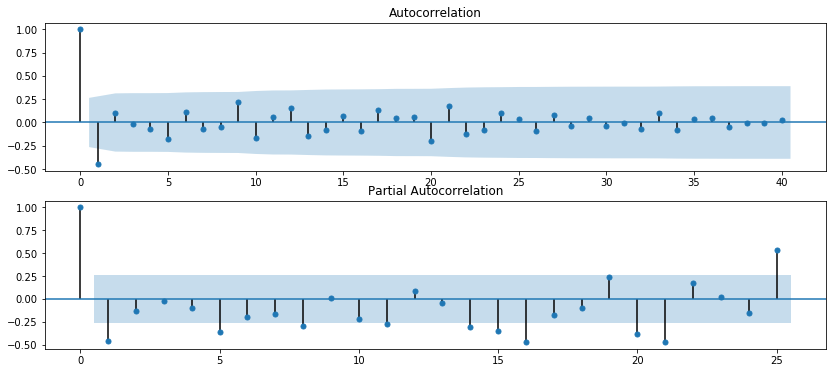

In [262]:
#plot Autocorrelation and Partial correlation after differencing
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(model_df['First sales difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(model_df['First sales difference'].dropna(),lags=25,ax=ax2)

In [263]:
#check for stationarity after differencing
ad_fuller_result = adfuller(model_df['First sales difference'].dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -11.670428595602553
p-value: 1.8404592041243465e-21


In [264]:
#fit ARIMA model
ARIMA_model = ARIMA(model_df['sales'], order = (1,1,1))
results = ARIMA_model.fit()

C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [265]:
#Make forecast using ARIMA model
model_df['forecast'] = results.predict(start = '2017-07-31', end = '2017-08-31', dynamic = True)

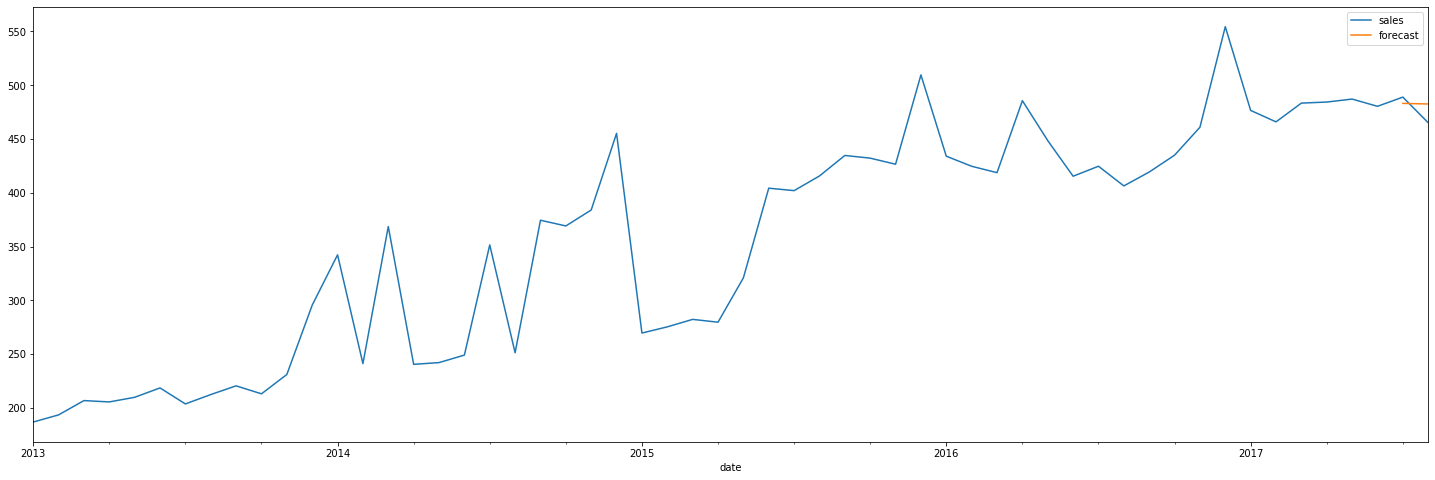

In [266]:
#visualize the ARIMA forecast for one month
model_df[['sales', 'forecast']].plot()

In [267]:
#create future dataset with 2 months NaN
future_dates=[model_df.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_df=pd.DataFrame(index=future_dates[1:],columns=model_df.columns)
future_df

,sales,First sales difference,forecast
2017-09-30,NaN,NaN,NaN
2017-10-31,NaN,NaN,NaN
2017-11-30,NaN,NaN,NaN
2017-12-31,NaN,NaN,NaN
2018-01-31,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN


In [268]:
#concate with model_df
future=pd.concat([model_df,future_df])
future.tail()

,sales,First sales difference,forecast
2018-03-31,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN
2018-06-30,NaN,NaN,NaN
2018-07-31,NaN,NaN,NaN


In [269]:
#forecast the future values using ARIMA model
future['forecast'] = results.predict(start = '2017-07-31', end = '2018-07-31', dynamic= True)
future

,sales,First sales difference,forecast
2013-01-31,186.952408,NaN,NaN
2013-02-28,193.581848,6.629440,NaN
2013-03-31,206.880585,13.298737,NaN
2013-04-30,205.639069,-1.241516,NaN
2013-05-31,209.943588,4.304520,NaN
...,...,...,...
2018-03-31,NaN,NaN,482.678894
2018-04-30,NaN,NaN,482.678892
2018-05-31,NaN,NaN,482.678893
2018-06-30,NaN,NaN,482.678893


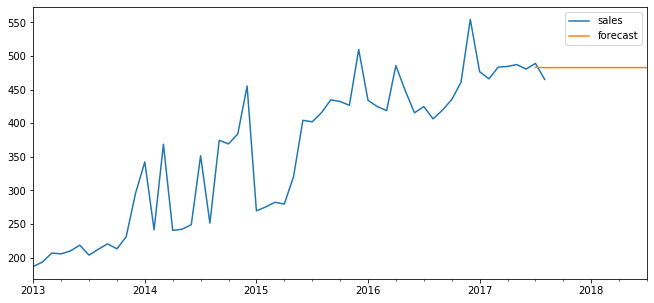

In [270]:
#plot future dataset
future[['sales', 'forecast']].plot(figsize=(11, 5))

In [271]:
#fill in NAs() for metrics
future = future.fillna(0)

In [272]:
#Create and fit SARIMAX model
SARIMAX_model = SARIMAX(model_df['sales'], order = (2,1,2), seasonal_order = (2,1,2,12))
sarimax_results = SARIMAX_model.fit()

C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\logan\anaconda3\envs\environment\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\logan\anaconda3\envs\environment\lib\site-pa

In [273]:
#forecast for a month
model_df_two['forecast'] = sarimax_results.predict(start = '2017-07-31', end = '2017-08-31', dynamic = True)

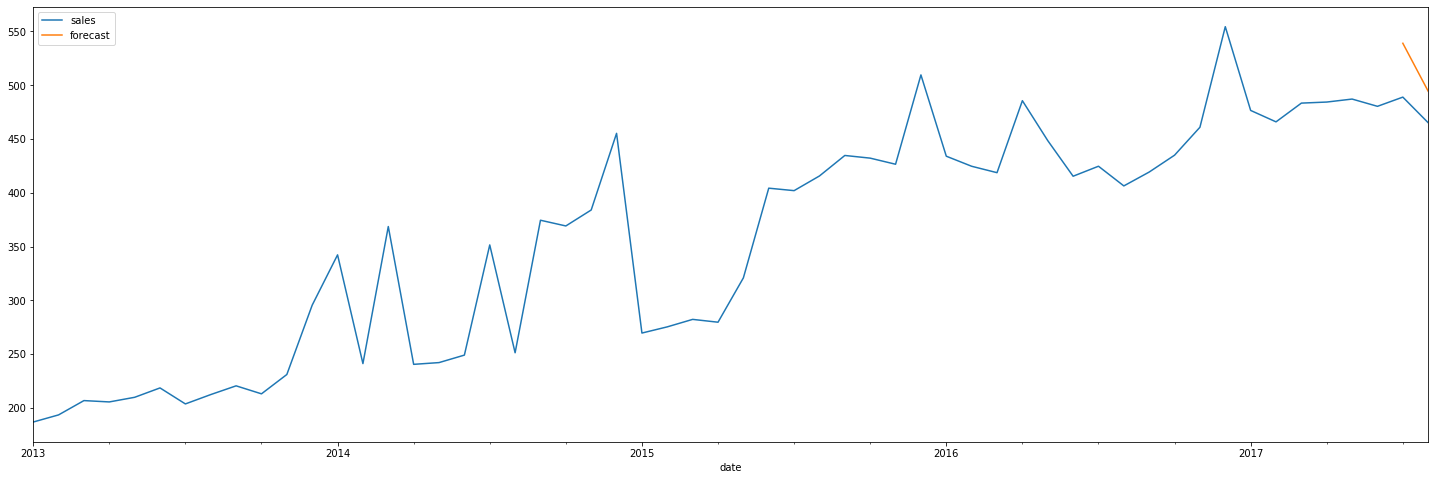

In [274]:
#plot initial SARIMAX forecast
model_df_two[['sales', 'forecast']].plot()

In [275]:
#create future dataset for SARIMAX model with 2 months NaN
future_dates_two=[model_df_two.index[-1]+ DateOffset(months=x)for x in range(0,12)]
future_df_two=pd.DataFrame(index=future_dates_two[1:],columns=model_df_two.columns)
future_df_two

,sales,forecast
2017-09-30,NaN,NaN
2017-10-31,NaN,NaN
2017-11-30,NaN,NaN
2017-12-31,NaN,NaN
2018-01-31,NaN,NaN
2018-02-28,NaN,NaN
2018-03-31,NaN,NaN
2018-04-30,NaN,NaN
2018-05-31,NaN,NaN
2018-06-30,NaN,NaN


In [276]:
#merge with SARIMAX model df
future_two=pd.concat([model_df_two,future_df_two])
future_two.tail()

,sales,forecast
2018-03-31,NaN,NaN
2018-04-30,NaN,NaN
2018-05-31,NaN,NaN
2018-06-30,NaN,NaN
2018-07-31,NaN,NaN


In [277]:
#forecast longer period with SARIMAX model
future_two['forecast'] = sarimax_results.predict(start = '2017-07-31', end = '2018-07-31', dynamic= True)
future_two

,sales,forecast
2013-01-31,186.952408,NaN
2013-02-28,193.581848,NaN
2013-03-31,206.880585,NaN
2013-04-30,205.639069,NaN
2013-05-31,209.943588,NaN
...,...,...
2018-03-31,NaN,548.730585
2018-04-30,NaN,534.342999
2018-05-31,NaN,551.370082
2018-06-30,NaN,591.016214


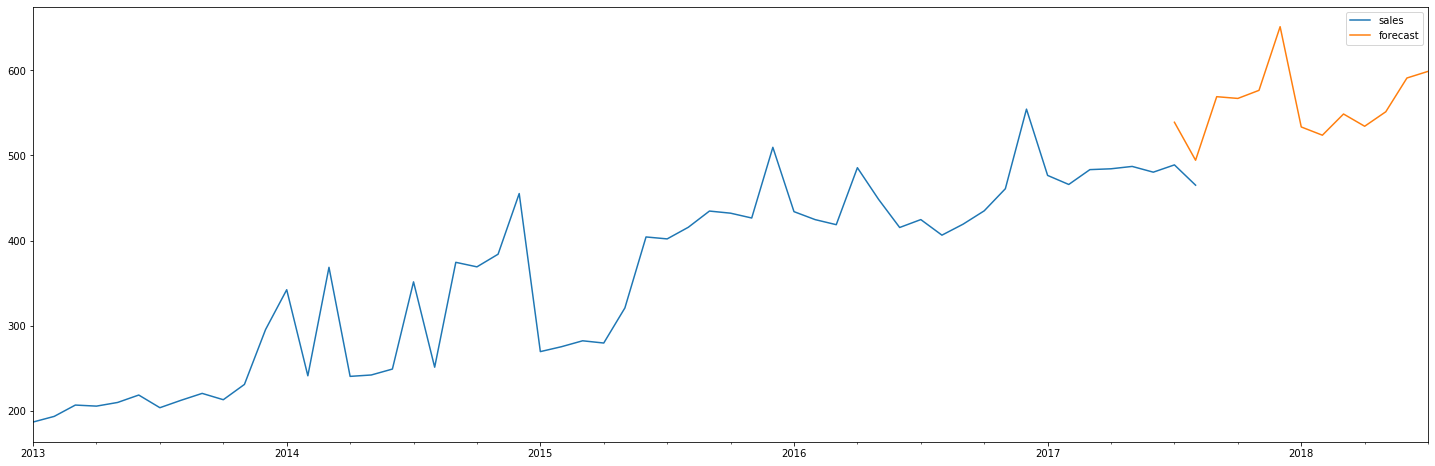

In [278]:
#plot longer SARIMAX forecast
future_two[['sales','forecast']].plot()

In [279]:
#fillnas for SARIMAX for metrics
future_two = future_two.fillna(0)

In [280]:
#calculate MSE for both models
from sklearn.metrics import *
mse_arima = mean_squared_error(future['sales'], future['forecast'])
mse_sarimax = mean_squared_error(future_two['sales'], future_two['forecast'])
print('ARIMA MSE: ', mse_arima)
print('SARIMAX MSE: ', mse_sarimax)

ARIMA MSE:  148242.06327400284
SARIMAX MSE:  163162.6889045021


In [281]:
#calculate RMSE for both models
RMSE_arima = np.sqrt(mean_squared_error(future['sales'], future['forecast']))
RMSE_sarimax = np.sqrt(mean_squared_error(future_two['sales'], future_two['forecast']))
print('ARIMA RMSE: ', RMSE_arima)
print('SARIMAX MSE: ', RMSE_sarimax)

ARIMA RMSE:  385.02215945839123
SARIMAX MSE:  403.9340155328616


In [282]:
#calculate MPE for both models
MAPE_arima = mean_absolute_percentage_error(future['sales'], future['forecast'])
MAPE_sarimax = mean_absolute_percentage_error(future_two['sales'], future_two['forecast'])
print('ARIMA MAPE: ', MAPE_arima)
print('SARIMAX MAPE: ', MAPE_sarimax)

ARIMA MAPE:  3.5689237596094144e+17
SARIMAX MAPE:  4.198098264391754e+17
